In [1]:
from classy import Class

In [2]:
import pickle

In [3]:
from aemulusnu_hmf_lib import massfunction

In [4]:
massfunction.cosmology

aemulusnu_hmf_lib.massfunction.cosmology

In [5]:
cosmos_f = open('../data/cosmo_params.pkl', 'rb')
cosmo_params = pickle.load(cosmos_f) #cosmo_params is a dict
cosmos_f.close()

In [6]:
curr_cosmology = massfunction.cosmology(cosmo_params['Box_n50_0_1400'])

In [7]:
curr_cosmology.Pm(1e-1, 0.0)

3165.83765798705

In [8]:
curr_cosmology.Pcb(1e-1, 0.0)

3199.506318337873

In [56]:
curr_cosmology.pkclass.get_background().keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_fld', '(.)w_fld', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

In [132]:
Omega_m = curr_cosmology.pkclass.get_current_derived_parameters(['Omega_m'])['Omega_m']

In [78]:
z_bg = curr_cosmology.pkclass.get_background()['z']
H_bg = curr_cosmology.pkclass.get_background()['H [1/Mpc]']

In [23]:
rho_crit_bg = curr_cosmology.pkclass.get_background()['(.)rho_crit']

In [32]:
rho_cdm_bg = curr_cosmology.pkclass.get_background()['(.)rho_cdm']
rho_b_bg = curr_cosmology.pkclass.get_background()['(.)rho_b']

In [33]:
import matplotlib.pyplot as plt

In [46]:
a_bg = 1/(1+z_bg)

In [47]:
curr_h = curr_cosmology.cosmology['H0']/100
curr_Om_b = curr_cosmology.cosmology['ombh2']/curr_h**2
curr_Om_c = curr_cosmology.cosmology['omch2']/curr_h**2

curr_cosmology.cosmology

{'ns': 0.97000003,
 'H0': 67.0,
 'w0': -1.0,
 'ombh2': 0.0223,
 'omch2': 0.12,
 'nu_mass_ev': 0.07071068,
 '10^9 As': 2.10100315}

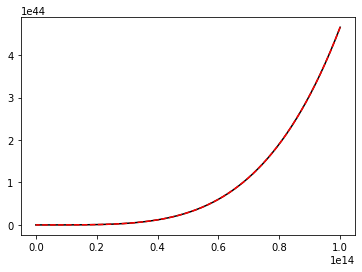

In [82]:
#checking rho_crit(z)
plt.plot(z_bg, rho_crit_bg, 'k')
plt.plot(z_bg, rho_crit_bg[-1]*(H_bg / H_bg[-1])**2, 'r--')

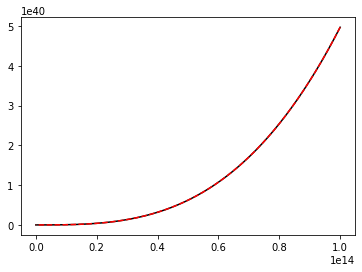

In [83]:
#Checking Ob a^(-3) = rho_b / rho_crit_0 
plt.plot(z_bg, curr_Om_b * a_bg**(-3),'k')
plt.plot(z_bg, rho_b_bg/rho_crit_bg[-1], 'r--', label='')

In [91]:
Ez = H_bg / H_bg[-1]

In [102]:
#overline{rho}_x = rho_crit(z) Omega_x(z) tinker08 above Eq. 1
#and from Tobias's notes e.g. Omega_m(z) = Omega_{m,0}/a**3 H0^2 / H**2

[]

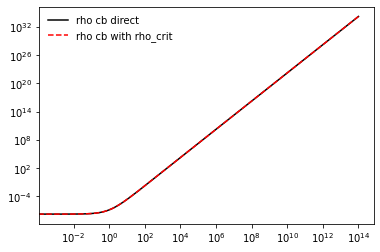

In [139]:
plt.plot(z_bg, (rho_cdm_bg + rho_b_bg), 'k', label='rho cb direct')
plt.plot(z_bg, rho_crit_bg * (curr_Om_b + curr_Om_c)*Ez**(-2)*a_bg**(-3) , 'r--', label='rho cb with rho_crit' )

# plt.plot(z_bg, rho_crit_bg * (Omega_m)*Ez**(-2)*a_bg**(-3) , 'b--', label='rho m with rho_crit' )
plt.legend(frameon=False)
plt.loglog()

(0.8, 1.2)

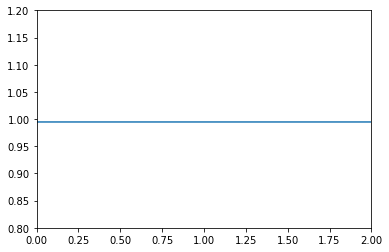

In [144]:
rhocb_direct = (rho_cdm_bg + rho_b_bg)
rho_m =  rho_crit_bg * (Omega_m)*Ez**(-2)*a_bg**(-3) 
plt.plot(z_bg, rhocb_direct/rho_m)
plt.xlim(0, 2)
plt.ylim(0.8, 1.2)

In [104]:
rho_crit_bg[-1] 

4.9946861016246935e-08

In [105]:
# now the final challenge is figuring out the units of this

In [107]:
# from slide 9 of https://lesgourg.github.io/class-tour/Padova/CLASS_Padova_Content.pdf
# it seems like rho_class = 8 pi G / 3 rho_class
# but also it seems like c=1 so really the conversion is like
# rho_class = 8 pi (G/c^2) / 3 rho_class

In [108]:
G_over_c2 = 4.79e-20 #Mpc / Msol

In [110]:
import numpy as np

In [116]:
rho_crit_physical = rho_crit_bg[-1] * 3 / (8 * np.pi * G_over_c2) / curr_h / curr_h # h^2 Msol / Mpc^3
print('%.2e'%(rho_crit_physical))

2.77e+11


In [120]:
from scipy.interpolate import interp1d

f_rho_cb = interp1d(x=z_bg, y = (rho_cdm_bg + rho_b_bg) * conversion)

[]

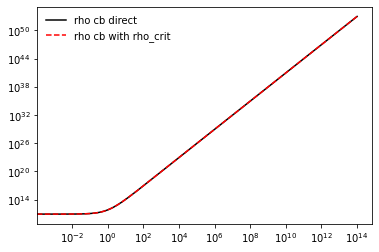

In [119]:
conversion =  3 / (8 * np.pi * G_over_c2) / curr_h / curr_h
plt.plot(z_bg, (rho_cdm_bg + rho_b_bg) * conversion, 'k', label='rho cb direct')
plt.plot(z_bg, rho_crit_bg * conversion * (curr_Om_b + curr_Om_c)*Ez**(-2)*a_bg**(-3) , 'r--', label='rho cb with rho_crit' )
plt.legend(frameon=False)
plt.loglog()

[]

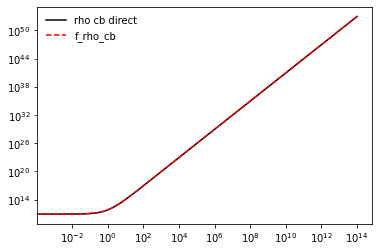

In [122]:
conversion =  3 / (8 * np.pi * G_over_c2) / curr_h / curr_h
plt.plot(z_bg, (rho_cdm_bg + rho_b_bg) * conversion, 'k', label='rho cb direct')
plt.plot(z_bg, f_rho_cb(z_bg) , 'r--', label='f_rho_cb' )
plt.legend(frameon=False)
plt.loglog()